In [1]:
# Import Meteostat library and dependencies
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
# from meteostat import Point, Daily

# Set time period
end = datetime(2024, 1, 1)
start = datetime(2014, 1, 1)



# Create Point for Vancouver, BC
# vancouver = Point(49.2497, -123.1193, 70)
# algeria = Point(36.7667, 3.1)

# # Get daily data for 2018
# data = Daily(vancouver, start, end)
# data = data.fetch()

# # Plot line chart including average, minimum and maximum temperature
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()

dates=pd.DataFrame(pd.date_range(start, end, freq='M'))
dates.reset_index(inplace=True)
dates.drop(columns=['index'], inplace=True)
dates.rename(columns ={0:'date'}, inplace=True)
dates['month'] = dates['date'].dt.month
dates['year'] = dates['date'].dt.year
dates['days'] = dates['date'].dt.day


C:\Users\Bidhan\AppData\Local\Temp\ipykernel_14396\2782907348.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.DataFrame(pd.date_range(start, end, freq='M'))


In [2]:
service = Service()
options = webdriver.FirefoxOptions()
# options.browser_version = '130.0.6723.70' 
driver = webdriver.Firefox(service=service, options=options)

# year = 2007
days = dates['days'].values
years = dates['year'].unique()
months = dates['month'].unique()

# for day in days:
for year in years:
        for month in months:
            # URL = f"https://www.wunderground.com/history/monthly/pt/ba%C3%A7al/LPBG/date/{year}-{month}"
            # URL = f"https://www.wunderground.com/history/monthly/dz/bejaia/DAAE/date/{year}-{month}"
            URL = f"https://www.wunderground.com/history/monthly/th/public-relations-department/VTBS/date/{year}-{month}"
            driver.get(URL)

            #     day = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[1]/table/tr/td')))
            #     print(day)
            #     temp_min = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[2]/table/tr/td[1]')))
            temp_avg = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[2]/table/tr/td[2]')))
            #     temp_max = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[2]/table/tr/td[3]')))
            #     dew_min = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[3]/table/tr/td[1]')))
            dew_avg = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[3]/table/tr/td[2]')))
            #     dew_max = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[3]/table/tr/td[3]')))
            #     hum_min = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[4]/table/tr/td[1]')))
            hum_avg = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[4]/table/tr/td[2]')))
            #     hum_max = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[4]/table/tr/td[3]')))
            #     wind_speed_min = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[5]/table/tr/td[1]')))
            wind_speed_avg = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[5]/table/tr/td[2]')))
            #     wind_speed_max = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[5]/table/tr/td[3]')))
            #     pressure_min = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[6]/table/tr/td[1]')))
            pressure_avg = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[6]/table/tr/td[2]')))
            #     pressure_max = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[6]/table/tr/td[3]')))
            precip = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[7]/table/tr/td')))

            #     df["day"] = [day[i].text for i in range(1, len(day))]
            df = pd.DataFrame()


            #     df["temp_min"] = [(float(temp_min[i].text) - 32) * 5/9 for i in range(1, len(temp_min))]
            df["temp_avg"] = [(float(temp_avg[i].text) - 32) * 5/9 for i in range(1, len(temp_avg))]
            #     df["temp_max"] = [(float(temp_max[i].text) - 32) * 5/9 for i in range(1, len(temp_max))]
            #     df["dew_min"] = [(float(dew_min[i].text) - 32) * 5/9 for i in range(1, len(dew_min))]
            df["dew_avg"] = [(float(dew_avg[i].text) - 32) * 5/9 for i in range(1, len(dew_avg))]
            #     df["dew_max"] = [(float(dew_max[i].text) - 32) * 5/9 for i in range(1, len(dew_max))]
            #     df["hum_min"] = [hum_min[i].text for i in range(1, len(hum_min))]
            df["hum_avg"] = [hum_avg[i].text for i in range(1, len(hum_avg))]
            #     df["hum_max"] = [hum_max[i].text for i in range(1, len(hum_max))]
            #     df["wind_speed_min"] = [float(wind_speed_min[i].text) * 1.60934 for i in range(1, len(wind_speed_min))]
            df["wind_speed_avg"] = [float(wind_speed_avg[i].text) * 1.60934 for i in range(1, len(wind_speed_avg))]
            #     df["wind_speed_max"] = [float(wind_speed_max[i].text) * 1.60934 for i in range(1, len(wind_speed_max))]
            #     df["pressure_min"] = [float(pressure_min[i].text) * 33.8639 for i in range(1, len(pressure_min))]
            df["pressure_avg"] = [float(pressure_avg[i].text) * 33.8639 for i in range(1, len(pressure_avg))]
            #     df["pressure_max"] = [float(pressure_max[i].text) * 33.8639 for i in range(1, len(pressure_max))]
            df["precip"] = [float(precip[i].text) * 25.4 for i in range(1, len(precip))]
            df["month"] = month
            df["year"] = year
#             df.set_index('day', inplace=True)

            month = f"0{month}" if month < 10 else month
            df.to_csv(f"./datasets/a_{year}-{month}_weather.csv")

            # display(df)

driver.quit()

KeyboardInterrupt: 

In [26]:
#mergeing whole dataset
from pathlib import Path
path = './datasets/'
# Get the files from the path provided in the OP
files = Path(path).glob('*.csv') 

dfs = []
for f in files:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [35]:
# df.drop(columns=['Unnamed: 0', 'file'],inplace =True)
df.describe()


,temp_avg,dew_avg,hum_avg,wind_speed_avg,pressure_avg,precip,month,year
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3939.0,3939.000000,3939.000000
mean,29.011058,22.212646,68.164966,12.143061,1008.641291,0.0,6.429551,2018.900482
std,1.900362,2.748013,8.326039,3.477993,16.885288,0.0,3.418024,3.113356
min,-17.777778,-17.777778,0.000000,0.000000,0.000000,0.0,1.000000,2014.000000
25%,28.166667,21.833333,63.200000,9.656040,1005.757830,0.0,3.000000,2016.000000
50%,29.111111,23.000000,68.700000,11.748182,1009.144220,0.0,6.000000,2019.000000
75%,30.055556,23.777778,73.750000,14.162192,1012.530610,0.0,9.000000,2022.000000
max,33.833333,26.833333,96.300000,29.129054,1019.303390,0.0,12.000000,2024.000000


In [227]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait




service = Service()
options = webdriver.FirefoxOptions()
driver = webdriver.Firefox(service=service, options=options)
#"//div[@id='d3_tree']
URL = f"https://tradingeconomics.com/thailand/industrial-production"
driver.get(URL)
# (By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[2]/table/tr/td[2]')))

node = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, 
'//div[@id="fullscreenVisualization"]//div[@class="highcharts-container "]')))

r=node[0].find_element(By.TAG_NAME, "svg")
g=r.find_element(By.TAG_NAME, "g")
p = g.find_element(By.TAG_NAME, "path")
# outer_node=driver.find_element(By.XPATH, "//div[@id='fullscreenVisualization']")
# inner_node = outer_node.find_element(By.CSS_SELECTOR, "# highcharts-79q8v9w-0.highcharts-container ")
print(p.get_attribute('d'))
#     time.sleep(0.1)
#     bg.send_keys(Keys.END)
#     heights.append(driver.execute_script("return document.body.scrollHeight"))
#     try :
#         bottom = heights[i-16]
#     except:
#         pass
#     if i%16 ==0:
#         new_bottom = heights[i-1]
#         if bottom == new_bottom:
#             break
driver.quit()

M 51.5 40 L 51.5 335


In [66]:
years = dates.year.unique()
years

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.firefox.service import Service
from selenium.webdriver import ActionChains

service = Service()
options = webdriver.FirefoxOptions()
driver = webdriver.Firefox(service=service, options=options)
#"//div[@id='d3_tree']
URL = f"https://tradingeconomics.com/thailand/industrial-production"
driver.get(URL)
# (By.XPATH, '//table[contains(@class, "days ng-star-inserted")]/tbody/tr/td[2]/table/tr/td[2]')))

node = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, 
'//div[@class="hawk-header"]//div[@class="topnav-flex-container"]//div[@class="hawk-chartOptions-datePicker-cnt"]//div[@id="dateSpansDiv"]')))

year = dates.year.unique()
# ref=node[0].find_element(By.XPATH, "//a[@data-span_str='1Y']")
# ref.click()    
    
# node1 = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, 
#  '//div[@id="fullscreenVisualization"]//div[@class="highcharts-container "]')))


# r=node1[0].find_elements(By.TAG_NAME, "svg")
# # g=r.find_element(By.XPATH, '//g[contains(@class,"highcharts-series.highcharts-series-0.highcharts-spline-series")]')
# # r[0].find_element(By.CSS_SELECTOR, "highcharts-series.highcharts-series-0.highcharts-spline-series")
# p = r[0].find_elements(By.TAG_NAME, "g")
# c = p[6].find_elements(By.TAG_NAME, "g")
# q = c[0].find_element(By.TAG_NAME, "path")
# h = p[2].find_elements(By.TAG_NAME, "path")
# l = [q.get_attribute('d')]
res = {"year":[], "x":[], "y":[]}
node2 = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, 
                    '//div[@id="dateInputsToggle"]')))
chart=node2[0].find_element(By.XPATH, "//div[@class='pickChartTypes']//div[@class='PREselectedChartType']//button[@class='dkLabels-label-btn selectedChartType']")
chart.click()
graph=chart.find_element(By.XPATH, "//div[@class='chartTypesWrapper dropDownStyle']//div[@class='splineChart']//button[@class='dkLabels-label-btn']")
graph.click()

parent_element = driver.find_elements(By.XPATH, "//div[@class='highcharts-container ']")

node1 = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, 
         '//div[@id="fullscreenVisualization"]//div[@class="highcharts-container "]')))

sub=node1[0].find_elements(By.TAG_NAME, "svg")
rects=sub[0].find_elements(By.TAG_NAME, "rect")


dic = {'w_0':[], 'w_1':[]}
# for year in years:    
  
sub=node1[0].find_elements(By.TAG_NAME, "svg")
rects=sub[0].find_elements(By.TAG_NAME, "rect")    
x_ = rects[4].get_attribute('x')
y_ = rects[4].get_attribute('y')
width = rects[4].get_attribute('width')
height = rects[4].get_attribute('height')

svg = node2[0].find_element(By.TAG_NAME, "svg")
svg.click()
start_date =svg.find_elements(By.XPATH, "//div[@id='dateInputs']//input[@id='d1']")
print(year)
start_date[0].clear()
start_date[0].send_keys("",f'{str(year)}-Jan-01')
end_date = svg.find_elements(By.XPATH, "//div[@id='dateInputs']//input[@id='d2']")
end_date[0].clear()
end_date[0].send_keys("",f'{str(year)}-Dec-31')


#     ele=WebDriverWait(driver,60).until(EC.visibility_of_all_elements_located((By.XPATH,
#                             "//div[@id='dateInputs']//button[@id='btnOK']")))
#     ele[0].click()
ref=node[0].find_element(By.XPATH, "//a[@data-span_str='MAX']")
ref.click()  

actions = ActionChains(driver)
actions.move_to_element(parent_element[0]).perform()
actions.move_to_element_with_offset(parent_element[0],int(x_),int(y_)).perform()
e=WebDriverWait(driver,30).until(EC.visibility_of_element_located((By.XPATH,
                 "//div[@class='highcharts-tooltip']")))
#e.click()
s=e.find_elements(By.XPATH, '//div[@class="highcharts-label highcharts-tooltip-box highcharts-color-none"]')
r=s[0].find_elements(By.TAG_NAME, 'span')
p=r[0].find_elements(By.XPATH, './/div[@class="tooltip-box"]')
w=p[0].find_elements(By.TAG_NAME, 'span')

#     actions.move_to_element(s[0]).perform()
#     actions.move_to_element_with_offset(s[0], 10, 10).perform()
#     last_location = s[0].location
#     last_size = s[0].size

y_ = int(y_) + (int(height) / 2)  
viewport_width = driver.execute_script("return window.innerWidth")
viewport_height = driver.execute_script("return window.innerHeight")

for step in range(1,int(width)-1):
    x_ = int(x_) + 1
    print(f"Click Position for Step {step}: ({x_}, {y_})")
    p=r[0].find_elements(By.XPATH, './/div[@class="tooltip-box"]')
    w=p[0].find_elements(By.TAG_NAME, 'span')
    dic['w_0'].append(w[0].text)
    dic['w_1'].append(w[1].text)
    if(w[0].text == f'Dec {year}'):
        break
    if x_ >= viewport_width or y_ >= viewport_height:
        print(f"Click Position {x_}, {y_} is out of viewport bounds.")
        continue


    actions.move_to_element_with_offset(parent_element[0],x_,y_ ).perform()

        
#     try:
#         while True:
#             # Allow some time for potential changes
#             time.sleep(0.1)
#             # Get the current pixel values
#             current_location = s[0].location
#             current_size = s[0].size
           
            
#             print('update location')
#             last_location = current_location
#             last_size = current_size
#             p=r[0].find_elements(By.XPATH, './/div[@class="tooltip-box"]')
#             w=p[0].find_elements(By.TAG_NAME, 'span')
#             dic['w_0'].append(w[0].text)
#             dic['w_1'].append(w[1].text)
            
#             print(f"Current Location: {current_location}, Current Size: {current_size}")
            
#             # Check if the values have changed
#             if (current_location == last_location) and (current_size == last_size):
#                 print("Pixel values have stabilized.")
#                 break

#             # Update last values
            
    
    
#     except KeyboardInterrupt:
#         print("Stopped by user.")
#         enabled the hidden element

    
    
#     driver.execute_script("arguments[0].setAttribute('style','visibility:visible;');",
#                           driver.find_element(By.XPATH,"//div[@class='highcharts-tooltip']")) 
    
    
#     driver.execute_script("arguments[0].setAttribute('style','visibility:visible;');",element) 
#     print(e.click())
# #     s=e[0].find_element(By.TAG_NAME, "span")
# #     driver.execute_script('arguments[0].setAttribute("style", "visibility: inherit");',e)
   
#     node1 = WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located((By.XPATH, 
#          '//div[@id="fullscreenVisualization"]//div[@class="highcharts-container "]')))

#     r=node1[0].find_elements(By.TAG_NAME, "svg")
    # g=r.find_element(By.XPATH, '//g[contains(@class,"highcharts-series.highcharts-series-0.highcharts-spline-series")]')
    # r[0].find_element(By.CSS_SELECTOR, "highcharts-series.highcharts-series-0.highcharts-spline-series")
#     p = r[0].find_elements(By.TAG_NAME, "g")
#     c = p[6].find_elements(By.TAG_NAME, "g")
#     x = c[0].find_elements(By.TAG_NAME, "path")
#     print(x)
#     y = c[1].find_element(By.TAG_NAME, "path")
#     y = c[1].find_element(By.TAG_NAME, "path")

#     h = p[2].find_elements(By.TAG_NAME, "path")

#     x_ = [x[0].get_attribute('d')]
#     y_ = [x[0].get_attribute('d')]
#     res['year'].append(year)
#     res['x'].append(x_)
#     res['y'].append(y_)
    
    
    


driver.quit()

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Click Position for Step 1: (26, 187.5)
Click Position for Step 2: (27, 187.5)
Click Position for Step 3: (28, 187.5)
Click Position for Step 4: (29, 187.5)
Click Position for Step 5: (30, 187.5)
Click Position for Step 6: (31, 187.5)
Click Position for Step 7: (32, 187.5)
Click Position for Step 8: (33, 187.5)
Click Position for Step 9: (34, 187.5)
Click Position for Step 10: (35, 187.5)
Click Position for Step 11: (36, 187.5)
Click Position for Step 12: (37, 187.5)
Click Position for Step 13: (38, 187.5)
Click Position for Step 14: (39, 187.5)
Click Position for Step 15: (40, 187.5)
Click Position for Step 16: (41, 187.5)
Click Position for Step 17: (42, 187.5)
Click Position for Step 18: (43, 187.5)
Click Position for Step 19: (44, 187.5)
Click Position for Step 20: (45, 187.5)
Click Position for Step 21: (46, 187.5)
Click Position for Step 22: (47, 187.5)
Click Position for Step 23: (48, 187.5)
Click Position for Step 24: (49, 187.

Click Position for Step 200: (225, 187.5)
Click Position for Step 201: (226, 187.5)
Click Position for Step 202: (227, 187.5)
Click Position for Step 203: (228, 187.5)
Click Position for Step 204: (229, 187.5)
Click Position for Step 205: (230, 187.5)
Click Position for Step 206: (231, 187.5)
Click Position for Step 207: (232, 187.5)
Click Position for Step 208: (233, 187.5)
Click Position for Step 209: (234, 187.5)
Click Position for Step 210: (235, 187.5)
Click Position for Step 211: (236, 187.5)
Click Position for Step 212: (237, 187.5)
Click Position for Step 213: (238, 187.5)
Click Position for Step 214: (239, 187.5)
Click Position for Step 215: (240, 187.5)
Click Position for Step 216: (241, 187.5)
Click Position for Step 217: (242, 187.5)
Click Position for Step 218: (243, 187.5)
Click Position for Step 219: (244, 187.5)
Click Position for Step 220: (245, 187.5)
Click Position for Step 221: (246, 187.5)
Click Position for Step 222: (247, 187.5)
Click Position for Step 223: (248,

Click Position for Step 396: (421, 187.5)
Click Position for Step 397: (422, 187.5)
Click Position for Step 398: (423, 187.5)
Click Position for Step 399: (424, 187.5)
Click Position for Step 400: (425, 187.5)
Click Position for Step 401: (426, 187.5)
Click Position for Step 402: (427, 187.5)
Click Position for Step 403: (428, 187.5)
Click Position for Step 404: (429, 187.5)
Click Position for Step 405: (430, 187.5)
Click Position for Step 406: (431, 187.5)
Click Position for Step 407: (432, 187.5)
Click Position for Step 408: (433, 187.5)
Click Position for Step 409: (434, 187.5)
Click Position for Step 410: (435, 187.5)
Click Position for Step 411: (436, 187.5)
Click Position for Step 412: (437, 187.5)
Click Position for Step 413: (438, 187.5)
Click Position for Step 414: (439, 187.5)
Click Position for Step 415: (440, 187.5)
Click Position for Step 416: (441, 187.5)
Click Position for Step 417: (442, 187.5)
Click Position for Step 418: (443, 187.5)
Click Position for Step 419: (444,

Click Position for Step 592: (617, 187.5)
Click Position for Step 593: (618, 187.5)
Click Position for Step 594: (619, 187.5)
Click Position for Step 595: (620, 187.5)
Click Position for Step 596: (621, 187.5)
Click Position for Step 597: (622, 187.5)
Click Position for Step 598: (623, 187.5)
Click Position for Step 599: (624, 187.5)
Click Position for Step 600: (625, 187.5)
Click Position for Step 601: (626, 187.5)
Click Position for Step 602: (627, 187.5)
Click Position for Step 603: (628, 187.5)
Click Position for Step 604: (629, 187.5)
Click Position for Step 605: (630, 187.5)
Click Position for Step 606: (631, 187.5)
Click Position for Step 607: (632, 187.5)
Click Position for Step 608: (633, 187.5)
Click Position for Step 609: (634, 187.5)
Click Position for Step 610: (635, 187.5)
Click Position for Step 611: (636, 187.5)
Click Position for Step 612: (637, 187.5)
Click Position for Step 613: (638, 187.5)
Click Position for Step 614: (639, 187.5)
Click Position for Step 615: (640,

In [8]:
sc_pr.drop(sc_pr[sc_pr['w_1'] == ''].index, inplace=True)

/tmp/ipykernel_13354/1791610238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sc_pr['w_0']=pd.to_datetime(sc_pr['w_0'])


<Axes: xlabel='w_0', ylabel='w_1'>

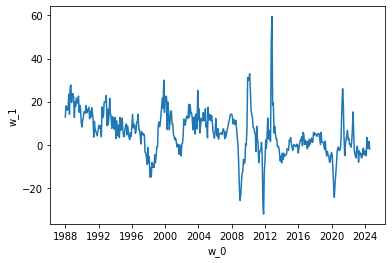

In [9]:
import seaborn as sns
# sc_pr=pd.DataFrame(dic).drop_duplicates()
sc_pr['w_1']=sc_pr['w_1'].apply(lambda x: float(x[:-1]))
sc_pr['w_0']=pd.to_datetime(sc_pr['w_0'])

sns.lineplot(data=sc_pr, x='w_0', y='w_1')

In [48]:
# sc_pr['year']=sc_pr['w_0'].dt.year
# sc_pr['month'] = sc_pr['w_0'].dt.month
# sc_pr[['month', 'year']].apply(lambda (x, y) : str(x)+'_'+str(x))
sc_pr['t']=sc_pr['month'].apply(lambda x: str(x)) + '_' + sc_pr['year'].apply(lambda x: str(x))

In [52]:
sc_pr.set_index('t', inplace=True)

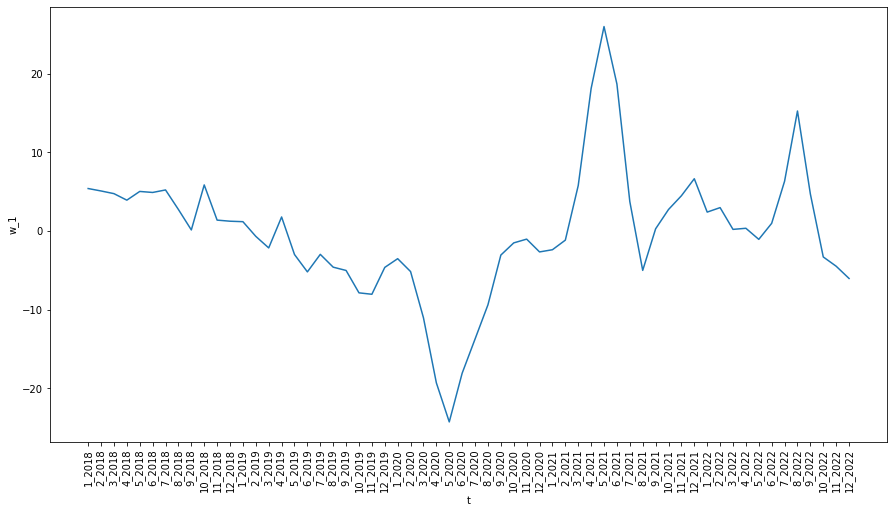

In [74]:
#sc_pr.set_index(['year','month'], inplace =True)

year=np.arange(2018, 2023)
month=np.arange(1,13)
plt.figure(figsize=(15,8))
idx = []
for y in year:
    for m in month:
        idx.append(str(m)+'_'+str(y))
g=sns.lineplot(sc_pr.loc[idx]['w_1'])
c=plt.xticks(rotation=90)


In [61]:
sc_pr

,year,month,w_0,w_1
t,,,,
1_1988,1988,1,1988-01-01,12.90
2_1988,1988,2,1988-02-01,18.10
3_1988,1988,3,1988-03-01,17.50
4_1988,1988,4,1988-04-01,16.10
5_1988,1988,5,1988-05-01,16.80
...,...,...,...,...
4_2024,2024,4,2024-04-01,3.43
5_2024,2024,5,2024-05-01,-1.54
6_2024,2024,6,2024-06-01,-1.63


In [10]:
sc_pr.to_csv('./sc_pr.csv')

In [350]:
# v=res['pct_change'][0]
# v=re.sub('[^1.-9.]', ' ', v[0]).split()
# v=np.array(v, dtype='float')
# pd.DataFrame(v[::-2]).plot()
year = res['year']
for k,attr in enumerate(res['pct_change']):
    v=re.sub('[^1.-9.]', ' ', attr[0]).split()
    v=np.array(v[::-6], dtype ='float')
    start_date = f'{year[k]}-1-1'
    end_date = f'{year[k]}-12-31'
    idx=pd.date_range(start_date , end_date, freq='M')
    temp = pd.DataFrame(v, index=idx)
    dates.set_index('date', inplace=True)
    dates.loc[start_date:end_date, 'pct_change'] = temp[0]
    #dates['ptc_change'] = temp
    dates.reset_index(inplace=True)

(269.9476923076919, 7.352307692306113)

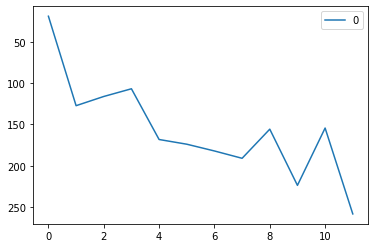

In [354]:
v=res['pct_change'][0]
v=re.sub('[^1.-9.]', ' ', v[0]).split()
v=np.array(v, dtype='float')
pd.DataFrame(v[::-6]).plot()
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

In [384]:
res['x'][0]

['M 0 258.011538461538 C 0 258.011538461538 37.422754491018 154.30769230769 62.37125748503 154.30769230769 C 84.905389221558 154.30769230769 96.17245508982201 223.519230769231 118.70658682635 223.519230769231 C 143.65508982036198 223.519230769231 156.12934131736802 155.66923076923 181.07784431138 155.66923076923 C 205.22155688622803 155.66923076923 217.29341317365203 190.84230769231 241.4371257485 190.84230769231 C 266.38562874251204 190.84230769231 278.859880239518 185.4519546027763 303.80838323353 181.99230769231002 C 327.952095808382 178.64426229508433 340.02395209580794 176.5461538461575 364.16766467066 173.82307692308 C 389.11616766467193 171.00923076923348 401.59041916167797 173.82307692308 426.53892215569 168.15 C 451.487425149702 162.47692307692 463.96167664670804 106.88076923077 488.91017964072 106.88076923077 C 513.053892215568 106.88076923077 525.1257485029921 112.16696090794875 549.26946107784 116.18461538462 C 574.2179640718521 120.33619167718074 586.692215568858 127.30384

In [385]:
res['y'][0]

['M 0 258.011538461538 C 0 258.011538461538 37.422754491018 154.30769230769 62.37125748503 154.30769230769 C 84.905389221558 154.30769230769 96.17245508982201 223.519230769231 118.70658682635 223.519230769231 C 143.65508982036198 223.519230769231 156.12934131736802 155.66923076923 181.07784431138 155.66923076923 C 205.22155688622803 155.66923076923 217.29341317365203 190.84230769231 241.4371257485 190.84230769231 C 266.38562874251204 190.84230769231 278.859880239518 185.4519546027763 303.80838323353 181.99230769231002 C 327.952095808382 178.64426229508433 340.02395209580794 176.5461538461575 364.16766467066 173.82307692308 C 389.11616766467193 171.00923076923348 401.59041916167797 173.82307692308 426.53892215569 168.15 C 451.487425149702 162.47692307692 463.96167664670804 106.88076923077 488.91017964072 106.88076923077 C 513.053892215568 106.88076923077 525.1257485029921 112.16696090794875 549.26946107784 116.18461538462 C 574.2179640718521 120.33619167718074 586.692215568858 127.30384

In [314]:
dates[dates['year'] == 2015]['pct_change'][::-1]

23     80.01875
22     23.23125
21    127.58750
20    174.41875
19    242.26875
18    170.73125
17    138.65000
16    152.29375
15    178.47500
14    177.00000
13    134.96250
12    159.30000
Name: pct_change, dtype: float64

In [302]:
dates[dates['year'] == 2015]['pct_change']

12    159.30000
13    134.96250
14    177.00000
15    178.47500
16    152.29375
17    138.65000
18    170.73125
19    242.26875
20    174.41875
21    127.58750
22     23.23125
23     80.01875
Name: pct_change, dtype: float64

In [274]:
start_date = pd.to_datetime(f'2015-1-1')
end_date = pd.to_datetime(f'2015-12-31')
dates.set_index('date', inplace =True)
print(dates.loc[start_date:end_date])
dates.reset_index(inplace=True)


            month  year  days  pct_change
date                                     
2015-01-31      1  2015    31   159.30000
2015-02-28      2  2015    28   134.96250
2015-03-31      3  2015    31   177.00000
2015-04-30      4  2015    30   178.47500
2015-05-31      5  2015    31   152.29375
2015-06-30      6  2015    30   138.65000
2015-07-31      7  2015    31   170.73125
2015-08-31      8  2015    31   242.26875
2015-09-30      9  2015    30   174.41875
2015-10-31     10  2015    31   127.58750
2015-11-30     11  2015    30    23.23125
2015-12-31     12  2015    31    80.01875


<Axes: xlabel='date'>

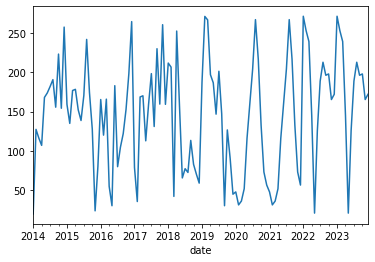

In [275]:
dates.set_index('date')['pct_change'].plot()

In [226]:
res['year']

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [12]:
import re 
res=re.sub('[^1.-9.]',' ', l[0]).split()
res=np.array(res, dtype='float')


In [343]:
# plt.plot(res[::-4])

(716,)

<Axes: >

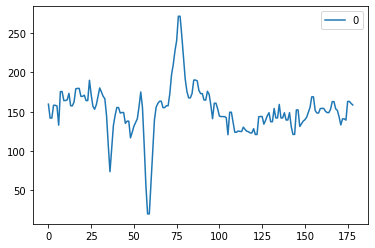

In [349]:
pd.DataFrame(res[::-4]).plot()

In [31]:
k = np.delete(res, [0,1,2,3])[::-2]

(284.0825, 7.267500000000023)

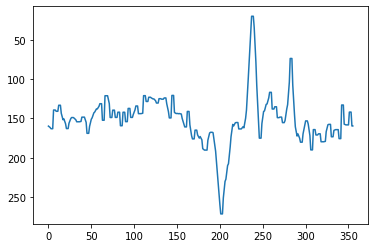

In [56]:
import matplotlib.pyplot as plt
plt.plot(np.delete(res, [0,1,2,3,4])[::-2][::-1])
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

(284.501176923077, 6.659284615383012)

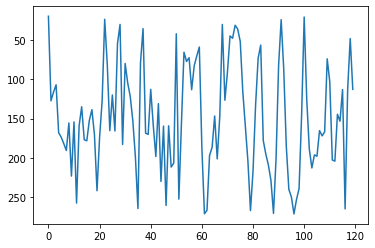

In [297]:
import matplotlib.pyplot as plt
plt.plot(dates['pct_change'])[::-2][::-1]
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

In [59]:
k = np.delete(res, [0,1,2,3,4])[::-2][::-1]

array([159.7147541 , 160.6       , 161.5147541 , 163.05      ,
       163.05      , 163.05      , 139.25      , 139.25      ,
       139.25      , 140.85      , 140.85      , 140.85      ,
       133.15      , 133.15      , 133.15      , 143.40847458,
       147.3       , 151.60847458, 150.48901639, 153.65      ,
       156.70901639, 162.85      , 162.85      , 162.85      ,
       156.00606557, 153.15      , 150.38606557, 148.8       ,
       148.8       , 148.8       , 149.57      , 150.65      ,
       151.73      , 154.2       , 154.2       , 154.2       ,
       154.2       , 154.        , 153.8       , 148.3       ,
       148.3       , 148.3       , 148.3       , 151.6       ,
       154.9       , 168.9       , 168.9       , 168.9       ,
       160.112     , 155.4       , 150.992     , 149.116     ,
       146.1       , 142.876     , 141.80229508, 139.8       ,
       137.86229508, 137.94180328, 136.25      , 134.50180328,
       131.2       , 131.2       , 131.2       , 152.25

In [120]:
from selenium.webdriver.support.ui import WebDriverWait
node[0].WebDriverWait(driver, 60).until(EC.visibility_of_all_elements_located(By.XPATH, "//div[@id='highcharts-2olzj5b-0']"))

AttributeError: 'WebElement' object has no attribute 'WebDriverWait'

In [111]:
import pandas as pd

# Loop to read 12 csv files and concatenate them into a single DataFrame
df_algeria_bejaia_2012_weather = pd.DataFrame()
for month in range(1, 13):
    month = f"0{month}" if month < 10 else month
    df_month = pd.read_csv(f'../datasets/algeria_bejaia_2012-{month}_weather.csv')
    df_algeria_bejaia_2012_weather = pd.concat([df_algeria_bejaia_2012_weather, df_month], axis=0)
df_algeria_bejaia_2012_weather.rename(columns={'date': 'day'}, inplace=True)
df_algeria_bejaia_2012_weather['date'] = pd.to_datetime(df_algeria_bejaia_2012_weather[['day', 'month', 'year']])
df_algeria_bejaia_2012_weather.drop(columns=['day', 'month', 'year'], inplace=True)
df_algeria_bejaia_2012_weather.set_index('date', inplace=True)
display(df_algeria_bejaia_2012_weather.head())

# Perform min-max scaling on every column of the DataFrame
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_algeria_bejaia_2012_weather_scaled = pd.DataFrame(scaler.fit_transform(df_algeria_bejaia_2012_weather), columns=df_algeria_bejaia_2012_weather.columns, index=df_algeria_bejaia_2012_weather.index)
display(df_algeria_bejaia_2012_weather_scaled.head())

,temp_min,temp_avg,temp_max,dew_min,dew_avg,dew_max,hum_min,hum_avg,hum_max,wind_speed_min,wind_speed_avg,wind_speed_max,pressure_min,pressure_avg,pressure_max,precip
date,,,,,,,,,,,,,,,,
2012-01-01,18.888889,11.000000,7.222222,10.000000,7.555556,2.777778,94,80.6,45,22.53076,8.529502,0.00000,1029.46256,1026.07617,1026.07617,0.0
2012-01-02,20.000000,13.111111,7.777778,12.222222,8.333333,6.111111,93,74.0,49,22.53076,17.380872,9.65604,1029.46256,1026.07617,1026.07617,0.0
2012-01-03,16.111111,13.222222,8.888889,10.000000,8.777778,7.777778,100,76.7,59,19.31208,8.046700,0.00000,1029.46256,1029.46256,1026.07617,0.0
2012-01-04,17.222222,11.111111,7.222222,10.000000,7.666667,6.111111,94,80.6,52,22.53076,6.759228,0.00000,1032.84895,1029.46256,1026.07617,0.0
2012-01-05,18.888889,12.055556,8.888889,12.777778,9.055556,7.222222,94,83.2,52,14.48406,5.149888,0.00000,1029.46256,1026.07617,1019.30339,0.0


,temp_min,temp_avg,temp_max,dew_min,dew_avg,dew_max,hum_min,hum_avg,hum_max,wind_speed_min,wind_speed_avg,wind_speed_max,pressure_min,pressure_avg,pressure_max,precip
date,,,,,,,,,,,,,,,,
2012-01-01,0.446154,0.301181,0.244444,0.288889,0.303965,0.493333,0.785714,0.710714,0.511364,0.083333,0.331034,0.000000,0.727273,0.857143,0.993443,0.0
2012-01-02,0.476923,0.375984,0.266667,0.377778,0.334802,0.573333,0.750000,0.592857,0.556818,0.083333,0.710345,0.666667,0.727273,0.857143,0.993443,0.0
2012-01-03,0.369231,0.379921,0.311111,0.288889,0.352423,0.613333,1.000000,0.641071,0.670455,0.064815,0.310345,0.000000,0.727273,0.904762,0.993443,0.0
2012-01-04,0.400000,0.305118,0.244444,0.288889,0.308370,0.573333,0.785714,0.710714,0.590909,0.083333,0.255172,0.000000,0.818182,0.904762,0.993443,0.0
2012-01-05,0.446154,0.338583,0.311111,0.400000,0.363436,0.600000,0.785714,0.757143,0.590909,0.037037,0.186207,0.000000,0.727273,0.857143,0.986885,0.0


In [112]:
df_algeria_fires = pd.read_csv('../datasets/algeria_2012_forest_fires.csv', nrows=122)
df_algeria_fires['date'] = pd.to_datetime(df_algeria_fires[['year', 'month', 'day']])
df_algeria_fires.drop(columns=['year', 'month', 'day'], inplace=True)
df_algeria_fires.set_index('date', inplace=True)

df_algeria_fires['Classes'] = df_algeria_fires['Classes'].str.strip()
df_algeria_fires['Classes'] = df_algeria_fires['Classes'].apply(lambda x: 0 if x == 'not fire' else 1)

display(df_algeria_fires.info()), display(df_algeria_fires.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2012-06-01 to 2012-09-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       122 non-null    object 
 1   area         122 non-null    object 
 2   Temperature  122 non-null    int64  
 3   RH           122 non-null    int64  
 4   Ws           122 non-null    int64  
 5   Rain         122 non-null    float64
 6   FFMC         122 non-null    float64
 7   DMC          122 non-null    float64
 8   DC           122 non-null    float64
 9   ISI          122 non-null    float64
 10  BUI          122 non-null    float64
 11  FWI          122 non-null    float64
 12  Classes      122 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 13.3+ KB


None

,region,area,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
date,,,,,,,,,,,,,
2012-06-01,Bejaia,ne,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
2012-06-02,Bejaia,ne,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2012-06-03,Bejaia,ne,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
2012-06-04,Bejaia,ne,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
2012-06-05,Bejaia,ne,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
2012-06-06,Bejaia,ne,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
2012-06-07,Bejaia,ne,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
2012-06-08,Bejaia,ne,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
2012-06-09,Bejaia,ne,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0


(None, None)

In [137]:
# Read Nino34 data
df_nino34 = pd.read_table('../datasets/sst_weekly.txt', delim_whitespace=True, skiprows=4, header=None, names=['week', 'nino12_sst', 'nono12_ssta', 'nino3_sst', 'nino3_ssta', 'nino34_sst', 'nino34_ssta', 'nino4_sst', 'nino4_ssta'])
# Parse the 'week' column as datetime and set it as the index
df_nino34['date'] = pd.to_datetime(df_nino34['week'])
df_nino34.drop(columns=['week'], inplace=True)

# Generate the dates to fill the gap in the data
idx = pd.date_range(start='1981-09-02', end='2024-09-18', freq='d')

# Use idx to reindex the DataFrame 
df_nino34 = df_nino34.set_index('date').reindex(idx)

# Fill the missing values using forward fill
df_nino34.fillna(method='ffill', inplace=True)

# df_nino34.set_index('date', inplace=True)
display(df_nino34.head(10))

# Scale the Nino34 data using MinMaxScaler
scaler = MinMaxScaler()
df_nino34_scaled = pd.DataFrame(scaler.fit_transform(df_nino34), columns=df_nino34.columns, index=df_nino34.index)
display(df_nino34_scaled.head(10))

C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nino34 = pd.read_table('../datasets/sst_weekly.txt', delim_whitespace=True, skiprows=4, header=None, names=['week', 'nino12_sst', 'nono12_ssta', 'nino3_sst', 'nino3_ssta', 'nino34_sst', 'nino34_ssta', 'nino4_sst', 'nino4_ssta'])
C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nino34['date'] = pd.to_datetime(df_nino34['week'])
C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_nino34.fillna(method='ffill', inplace=True

,nino12_sst,nono12_ssta,nino3_sst,nino3_ssta,nino34_sst,nino34_ssta,nino4_sst,nino4_ssta
1981-09-02,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-03,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-04,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-05,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-06,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-07,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-08,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-09,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2
1981-09-10,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2
1981-09-11,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2


,nino12_sst,nono12_ssta,nino3_sst,nino3_ssta,nino34_sst,nino34_ssta,nino4_sst,nino4_ssta
1981-09-02,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-03,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-04,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-05,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-06,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-07,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-08,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-09,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10
1981-09-10,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10
1981-09-11,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10


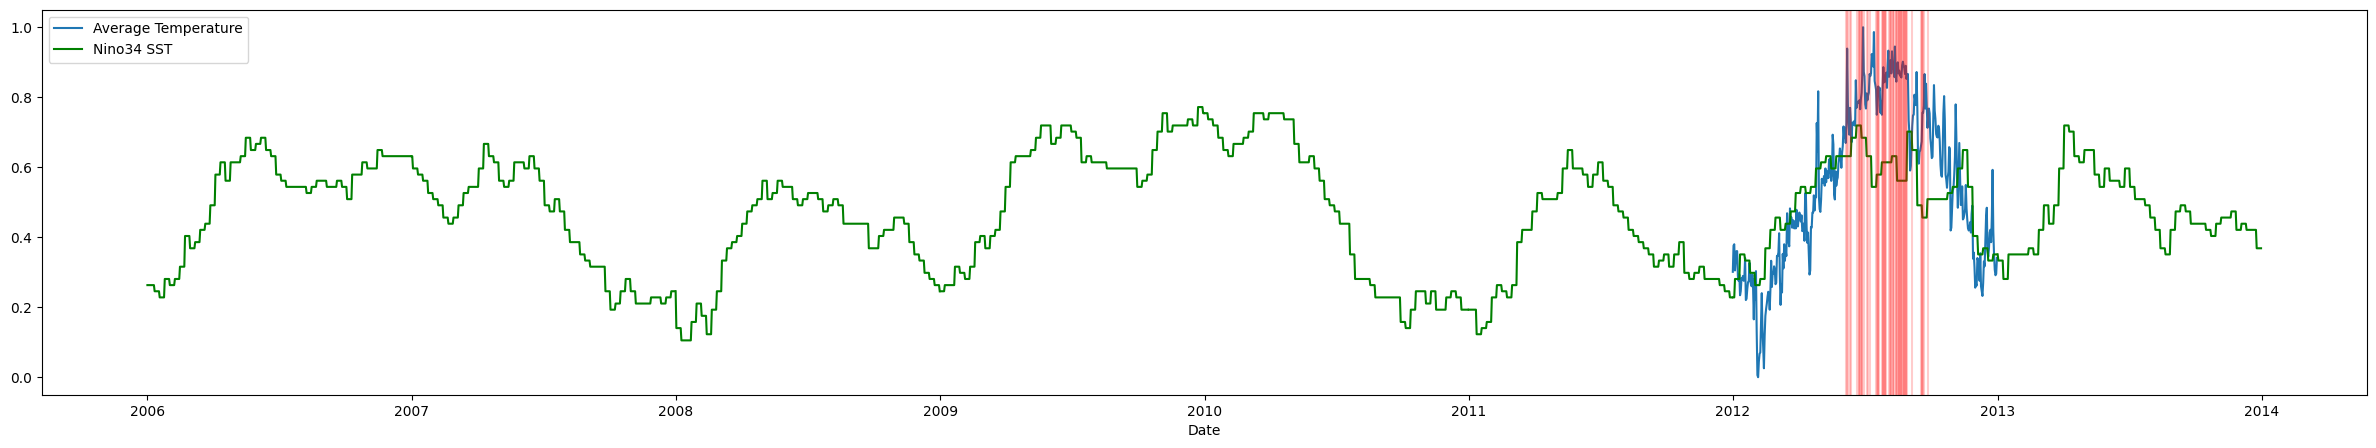

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the average temperature with min, max as error band using seaborn
plt.figure(figsize=(30, 5))
sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['temp_avg'], label='Average Temperature')
# plt.fill_between(df_algeria_bejaia_2012_weather.index, df_algeria_bejaia_2012_weather['temp_min'], df_algeria_bejaia_2012_weather['temp_max'], alpha=0.2)
# Add humidity to the plot
# sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['hum_avg'], label='Average Humidity')
# Add wind speed to the plot
# sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['wind_speed_avg'], label='Average Wind Speed')

sns.lineplot(data=df_nino34_scaled['nino34_sst']['2006'], color='g', label='Nino34 SST')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2007'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2008'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2009'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2010'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2011'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2012'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2013'], color='g')

plt.ylabel('')
plt.xlabel('Date')
plt.legend( loc='upper left')
# Adding vertical lines to indicate the forest fires by checking Classes column for the forest fires events
for date in df_algeria_fires[df_algeria_fires['Classes'] == 1].index:
    plt.axvline(x=date, color='r', linestyle='-', alpha=0.2)

# Add red bubble to indicate the forest fires
# for date in df_algeria_fires[df_algeria_fires['Classes'] == 1].index:
    # plt.scatter(x=date, y=df_algeria_bejaia_2012_weather_scaled.loc[date, 'temp_avg'], color='r', marker='o', s=100, alpha=0.5)

plt.show()